In [217]:
import pandas as pd
import numpy as np

% matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from datetime import datetime
from datetime import timedelta

from pandas.tseries.offsets import *

import seaborn as sns

## Load files

In [220]:

raw_data = pd.read_csv('raw-data/results_feline.txt', sep='\t', header=None, 
                       names=['algo','level','filename', 'compress_sec','size','uncompress_sec'])


# Convert nan levels to zeros
raw_data['level'].fillna('x', inplace=True)

print(raw_data)

       algo level                                           filename  \
0       raw     x  APLUWCOVISMBSONAR001_20120401T063122.045Z-DIFF...   
1       raw     x  APLUWCOVISMBSONAR001_20120401T121001.449Z-DOPP...   
2       raw     x  APLUWCOVISMBSONAR001_20120401T210919.187Z-DOPP...   
3       raw     x  APLUWCOVISMBSONAR001_20120401T180042.337Z-IMAG...   
4       raw     x  APLUWCOVISMBSONAR001_20120401T124747.207Z-DIFF...   
5       raw     x  APLUWCOVISMBSONAR001_20120401T150042.980Z-IMAG...   
6       raw     x  APLUWCOVISMBSONAR001_20120401T030958.766Z-DOPP...   
7       raw     x  APLUWCOVISMBSONAR001_20120401T034727.647Z-DIFF...   
8       raw     x  APLUWCOVISMBSONAR001_20120401T000042.191Z-IMAG...   
9       raw     x  APLUWCOVISMBSONAR001_20120401T094646.018Z-DIFF...   
10      raw     x  APLUWCOVISMBSONAR001_20120401T000952.221Z-DOPP...   
11      raw     x  APLUWCOVISMBSONAR001_20120401T155139.127Z-DIFF...   
12      raw     x  APLUWCOVISMBSONAR001_20120401T184830.333Z-DIF

## Reprocess data files to get out compression percentages

In [221]:

data = raw_data.set_index(['filename','algo','level'])

## Pull out just the size data
size = data['size'].copy()
size = size.unstack(level=[1,2])

## Add a total size line
total_size = size.sum( axis='index')
#print(total_size)

##
times = data.copy()
times = times.unstack(level=[1,2])
# print(times)

total_times = times.sum( axis='index')
#total_times = pd.to_timedelta( (total_times*1000).astype('int'), unit='ms')
print(total_times['compress_sec'])

algo    level
raw     x            0.000000
gzip    1         1134.149519
pigz    1          229.572421
bzip2   1         5464.771769
lbzip2  1          856.941164
pbzip2  1         1010.160233
gzip    2         1247.660576
pigz    2          249.194615
bzip2   2         5405.056280
lbzip2  2          841.106214
pbzip2  2         1007.037122
gzip    3         1775.783068
pigz    3          343.999511
bzip2   3         5442.155884
lbzip2  3          845.749927
pbzip2  3         1024.434403
gzip    4         1626.709995
pigz    4          329.375821
bzip2   4         5467.885546
lbzip2  4          854.386123
pbzip2  4         1039.557113
gzip    5         2495.876166
pigz    5          491.731892
bzip2   5         5543.082461
lbzip2  5          859.681493
pbzip2  5         1051.849320
gzip    6         4691.977458
pigz    6          855.655298
bzip2   6         5581.821076
lbzip2  6          867.155565
pbzip2  6         1064.353845
gzip    7         7008.029270
pigz    7         1236.738

In [222]:
## Compute compresion ratios

raw_size = size['raw','x']
pct_compression = size.divide(raw_size, axis='index')
total_compression = total_size / total_size['raw','x']


print(pct_compression)
print(total_compression)

algo                                                raw      gzip      pigz  \
level                                                 x         1         1   
filename                                                                      
APLUWCOVISMBSONAR001_20120401T000042.191Z-IMAGI...  1.0  0.324029  0.321938   
APLUWCOVISMBSONAR001_20120401T000952.221Z-DOPPL...  1.0  0.338677  0.336543   
APLUWCOVISMBSONAR001_20120401T004720.076Z-DIFFU...  1.0  0.306749  0.302500   
APLUWCOVISMBSONAR001_20120401T030041.027Z-IMAGI...  1.0  0.329227  0.327205   
APLUWCOVISMBSONAR001_20120401T030958.766Z-DOPPL...  1.0  0.337139  0.334979   
APLUWCOVISMBSONAR001_20120401T034727.647Z-DIFFU...  1.0  0.307433  0.303366   
APLUWCOVISMBSONAR001_20120401T060039.224Z-IMAGI...  1.0  0.322798  0.320655   
APLUWCOVISMBSONAR001_20120401T061005.867Z-DOPPL...  1.0  0.336795  0.334606   
APLUWCOVISMBSONAR001_20120401T063122.045Z-DIFFU...  1.0  0.300609  0.297078   
APLUWCOVISMBSONAR001_20120401T090040.249Z-IMAGI...  

In [223]:
## Create compression ratio plot

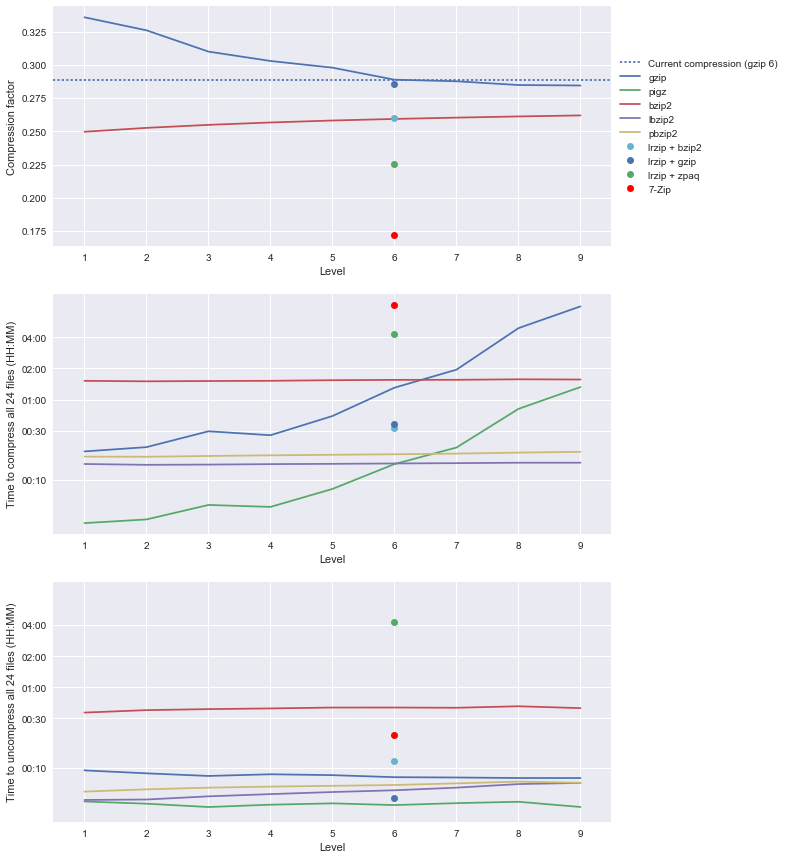

In [236]:
sns.set()
plt.figure()
# Create a figure with a single subplot
f, ax = plt.subplots(3, figsize=(10,15))

data = total_compression



# ## Plot 
# for algo in [ 'gzip', 'bzip2']:
#     ax[0].plot( data[algo], label=algo)


# ax[0].plot(6, data['lrzip','bzip2'], 'o', label='lrzip + bzip2')
# ax[0].plot(6, data['lrzip','gzip'], 'o', label='lrzip + gzip')
# ax[0].plot(6, data['lrzip','zpaq'], 'o', label='lrzip + zpaq')

# ax[0].plot(9, data['7z','x'], 'ro', label='7-Zip')

for idx,data in enumerate( [total_compression, 
                            total_times['compress_sec'], 
                            total_times['uncompress_sec']]):

    if idx == 0:
        ax[idx].axhline(data['gzip','6'], ls=':', label='Current compression (gzip 6)')
    
    for algo in [ 'gzip', 'pigz', 'bzip2', 'lbzip2', 'pbzip2']:
        if algo in ['pigz', 'lbzip2', 'pbzip2'] and idx == 0:
            ax[idx].plot( [0.3], label=algo)
        else:    
            ax[idx].plot( data[algo], label=algo)

    ax[idx].plot(6, data['lrzip','bzip2'], 'o', label='lrzip + bzip2')
    ax[idx].plot(6, data['lrzip','gzip'], 'o', label='lrzip + gzip')
    ax[idx].plot(6, data['lrzip','zpaq'], 'o', label='lrzip + zpaq')

    ax[idx].plot(6, data['7z','x'], 'ro', label='7-Zip')

    ax[idx].set_xlim([0.5,9.5])
    
#ax[0].legend()
# Put a legend to the right of the current axis
ax[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax[0].set_ylabel("Compression factor")
ax[0].set_xlabel("Level")

def timeTicks(x, pos):
    d = timedelta(seconds=x.item())
    
    seconds = d.total_seconds() # drop microseconds
    minutes, seconds = divmod(seconds, 60)
    hours, minutes = divmod(minutes, 60)
    return "%02d:%02d" % (hours,minutes)
    
    #return str(d)
    
formatter = ticker.FuncFormatter(timeTicks)

ax[1].set_ylabel("Time to compress all 24 files (HH:MM)")
ax[2].set_ylabel("Time to uncompress all 24 files (HH:MM)")

for i in [1,2]:
    ax[i].set_xlabel("Level")
    ax[i].set_yscale('log', basey=60)
    ax[i].set_yticks([60*10, 60*30, 60*60, 60*60*2, 60*60*4 ])
    ax[i].yaxis.set_major_formatter(formatter) 

ax[2].set_ylim( ax[1].get_ylim() )
    
plt.show()

